In [ ]:
import tensorflow as tf
import numpy as np
import pandas as pd
import random
from tensorflow.keras import layers
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import plot_model
!wget https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/extras/helper_functions.py
from helper_functions import calculate_results
from helper_functions import create_tensorboard_callback
from helper_functions import make_confusion_matrix

--2024-01-02 13:14:49--  https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/extras/helper_functions.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 10246 (10K) [text/plain]
Saving to: ‘helper_functions.py.1’

helper_functions.py 100%[===================>]  10.01K  --.-KB/s    in 0.002s  

2024-01-02 13:14:49 (3.96 MB/s) - ‘helper_functions.py.1’ saved [10246/10246]



In [ ]:
Starting_data = [["why did he walk far and fast",["STATEMENT", ["why"]] ,["why", ["he"]], ["he", ["walk"]], ["walk", ["fast", "far"]]],
            ["how did we all skip school", ["how", ["did"]], ["did", ["we"]],["we", ["skip"]], ["skip", ["school"]]],
            ["I love cake", ["STATEMENT", ["I"]], ["I", ["love"]],["love", ["cake"]]],
            ["Do the people want pizza or tacos", ["Do", ["people"]], ["people", ["want"]],["want", ["or"]], ["or", ["pizza", "tacos"]]],
            ["Why do so many people like Minecraft", ["why", ["people"]], ["so", ["many"]], ["people", ["many", "like"], [["like", ["Minecraft"]]]]],
            ["When was America founded", ["When", ["America"]], ["America", ["founded"]]],
            ["When was Mexico founded", ["When", ["Mexico"]], ["Mexico", ["founded"]]],
            ["When was Canada founded", ["When", ["Canada"]], ["Canada", ["founded"]]],
            ["When was Poland founded", ["When", ["Poland"]], ["Poland", ["founded"]]],
            ["Why did the chicken cross the road", ["Why", ["did"]], ["did", ["chicken"]], ["chicken",["cross"]], ["cross", ["road"]]],
            ["She finished her homework late", ["She", ["finished"]], ["her", ["finished", "homework"]], ["finished", ["homework", "late"]]],
            ["I created a new cake recipy", ["I", ["created"]], ["created", ["recipy"]], ["recipy", ["cake", "new"]]],
            ["Why did he jump over the wall", ["Why",["he"]], ["he", ["jump"]], ["jump", ["over", "wall"]]],
            ["America is awesome", ["America", ["awesome"]]],
            ["coding is fun", ["coding", ["fun"]]],
            ["When is the next holiday", ["When", ["next", "holiday"]], ["next", ["holiday"]]],
            ["Why did Rome fall", ["Why", ["Rome", "fall"]], ["Rome", ["fall"]]],
            ["America is a world superpower", ["STATEMENT",["America"]], ["America",["world", "superpower"]], ["superpower",["world"]]],
            ["When is the best time for fishing", ["When", ["best", "time"]], ["time",["best", "fishing"]]],
            ["Who was George Washington", ["Who", ["George", "Washington"]]],
            ["The great depretion was a awful time in America", ["STATEMENT", ["great", "depretion"]], ["great",["depretion", "awful"]], ["awful",["time"]], ["time", ["America"]]],
            ["i like pizza", ["STATEMENT", ["I"]], ["I", ["like"]], ["like", ["pizza"]]],
            ["i like America", ["STATEMENT", ["I"]], ["I", ["like"]], ["like", ["America"]]],
            ["i like Minecraft", ["STATEMENT", ["I"]], ["I", ["like"]], ["like", ["Minecraft"]]],
            ["i like popcorn", ["STATEMENT", ["I"]], ["I", ["like"]], ["like", ["popcorn"]]],
            ["I like oranges", ["STATEMENT", ["I"]], ["I", ["like"]], ["like", ["oranges"]]],
            ["I like the sky", ["STATEMENT", ["I"]], ["I", ["like"]], ["like", ["sky"]]],
            ["I love pizza", ["STATEMENT", ["I"]], ["I", ["love"]], ["love", ["pizza"]]],
            ["I love America", ["STATEMENT", ["I"]], ["I", ["love"]], ["love", ["America"]]],
            ["I love Minecraft", ["STATEMENT", ["I"]], ["I", ["love"]], ["love", ["Minecraft"]]],
            ["I love popcorn", ["STATEMENT", ["I"]], ["I", ["love"]], ["love", ["popcorn"]]],
            ["I love oranges", ["STATEMENT", ["I"]], ["I", ["love"]], ["love", ["oranges"]]],
            ["I love the sky", ["STATEMENT", ["I"]], ["I", ["love"]], ["love", ["sky"]]],
            ["I love oranges", ["STATEMENT", ["I"]], ["I", ["love"]], ["love", ["oranges"]]],
            ["I hate popcorn", ["STATEMENT", ["I"]], ["I", ["hate"]], ["hate", ["popcorn"]]],
            ["I hate oranges", ["STATEMENT", ["I"]], ["I", ["hate"]], ["hate", ["oranges"]]],
            ["I hate the sky", ["STATEMENT", ["I"]], ["I", ["hate"]], ["hate", ["sky"]]],
            ["When is vacation", ["When", ["vacation"]]],
            ["When is Christmas", ["When", ["Christmas"]]],
            ["When is summer", ["When", ["summer"]]],
            ["When is fall", ["When", ["fall"]]],
            ["When is winter", ["When", ["winter"]]],
            ["When is spring", ["When", ["sprint"]]],
            ["When will spring end", ["When", ["spring", "end"]], ["spring", ["end"]]],
            ["When will winter end", ["When", ["winter", "end"]], ["winter", ["end"]]],
            ["When will fall end", ["When", ["fall", "end"]], ["fall", ["end"]]],
            ["When will spring end", ["When", ["summer", "end"]], ["summer", ["end"]]],
            ["have you ever played Minecraft", ["have", ["you"]], ["you", ["played"]], ["played",["Minecraft"]]],
            ["have you ever played Fortnight", ["have", ["you"]], ["you", ["played"]], ["played",["Fortnight"]]],
            ["have you ever played magic the gathering", ["have", ["you"]], ["you", ["played"]], ["played",["magic", "the", "gathering"]]],
            ["have you ever played chess or checkers", ["have", ["you"]], ["you", ["played"]], ["played", ["or"]], ["or", ["chess, checkers"]]],
            ["have you ever played poker or guts", ["have", ["you"]], ["you", ["played"]], ["played", ["or"]], ["or", ["poker, guts"]]],
            ["You have a passport", ["STATEMENT", ["you"]], ["you",["have"]], ["have",["passport"]]],
            ["You have a house", ["STATEMENT", ["you"]], ["you",["have"]], ["have",["house"]]],
            ["You have a car and boat", ["STATEMENT", ["you"]], ["you",["have"]], ["have",["and"]], ["and",["car", "boat"]]],
            ["You have a door", ["STATEMENT", ["you"]], ["you",["have"]], ["have",["door"]]],
            ["You have roommates", ["STATEMENT", ["you"]], ["you",["have"]], ["have",["roommate"]]],
            ["You have friends", ["STATEMENT", ["you"]], ["you",["have"]], ["have",["friends"]]],
            ["You have homework", ["STATEMENT", ["you"]], ["you",["have"]], ["have",["homework"]]],
            ["We should go home", ["STATEMENT", ["We"]], ["we",["should"]], ["should", ["go"]], ["go",["home"]]],
            ["We should get a job", ["STATEMENT", ["We"]], ["we",["should"]], ["should", ["get"]], ["get",["job"]]],
            ["We should start", ["STATEMENT", ["We"]], ["we",["should"]], ["should", ["start"]]],
            ["George Washington was the first American President", ["STATMENT",["George", "Washington"]], ["George", ["first"]], ["first",["American", "President"]]],
            ["Britian was the first great empire", ["STATMENT",["Britian"]], ["Britian", ["first"]], ["first",["empire"]], ["empire", ["great"]]],
            ["Abraham was the 16th American President", ["STATMENT",["Abraham",]], ["Abraham", ["16th"]], ["16th",["American", "President"]]],
            ["France was the lamest European country", ["STATMENT",["France"]], ["France", ["lamest"]], ["lamest",["European", "country"]]],
            ["the grass is green and well kept", ["STATEMENT", ["grass"]], ["grass", ["and"]], ["and", ["kept", "green"]], ["kept", ["well"]]],
            ["the house is yellow and built well", ["STATEMENT", ["house"]], ["house", ["and"]], ["and", ["yellow", "built"]], ["built", ["well"]]],
            ["the orange is orange and tasty", ["STATEMENT", ["orange"]], ["orange", ["and"]], ["and", ["orange", "tasty"]]],
            ["the tree is green and tall", ["STATEMENT", ["tree"]], ["tree", ["and"]], ["and", ["green", "tall"]]],
            ["pizza is tasty", ["STATEMENT", ["pizza"]], ["pizza", ["tasty"]]],
            ["trees are green", ["STATEMENT", ["trees"]], ["trees", ["green"]]],
            ["thier are no houses", ["STATEMENT", ["thier"]], ["thier", ["no"]], ["houses", ["houses"]]],
            ["birds have feathers and can fly", ["STATEMENT", ["birds"]], ["birds", ["and"]], ["and", ["have", "can"]], ["have", ["feathers"]], ["can", ["fly"]]],
            ["What color is grass", ["What", ["grass"]], ["grass", ["color"]]],
            ["The sky is blue", ["STATEMENT", ["sky"]],["sky", ["blue"]]],
            ["What color is the sky", ["What", ["sky"]], ["sky",["color"]]],
            ["Russia is the biggest contry in the world", ["STATEMENT",["Russia"]], ["Russia", ["biggest"]], ["biggest", ["contry"]], ["country", ["world"]]],
            ["America has the biggest economy in the world", ["STATEMENT",["America"]], ["America", ["biggest"]], ["biggest", ["economy"]], ["economy", ["world"]]],
            ["Canada is the nicest counrty in the world", ["STATEMENT",["Canada"]], ["Canada", ["nicest"]], ["nicest", ["contry"]], ["contry", ["world"]]],
            ["Oranges are very tasty", ["STATEMENT", ["oranges"]], ["oranges", ["tasty"]]],
            ["Houses need to be built", ["STATEMENT", ["House"]], ["Houses",["need"]], ["need",["built"]]],
            ["Cars are fast", ["STATEMENT",["Cars"]], ["Cars", ["fast"]]],
            ["Jobs gets you money",["STATEMENT", ["Jobs"]], ["Jobs", ["you"]], ["you", ["gets"]], ["gets",["money"]]],
            ["Happy new year", ["STATEMENT", ["happy"]], ["happy", ["new", "year"]]]
                 ]

In [ ]:
random.shuffle(Starting_data)
X_train, X_test = train_test_split(Starting_data, test_size=0.33, random_state=42)
print(X_train)
print(X_test)
X_train = Starting_data #running on training data due to lack of data for encoder and decoder

[['When is vacation', ['When', ['vacation']]], ['the house is yellow and built well', ['STATEMENT', ['house']], ['house', ['and']], ['and', ['yellow', 'built']], ['built', ['well']]], ['When is Christmas', ['When', ['Christmas']]], ['You have a passport', ['STATEMENT', ['you']], ['you', ['have']], ['have', ['passport']]], ['When was Mexico founded', ['When', ['Mexico']], ['Mexico', ['founded']]], ['She finished her homework late', ['She', ['finished']], ['her', ['finished', 'homework']], ['finished', ['homework', 'late']]], ['I love pizza', ['STATEMENT', ['I']], ['I', ['love']], ['love', ['pizza']]], ['We should go home', ['STATEMENT', ['We']], ['we', ['should']], ['should', ['go']], ['go', ['home']]], ['coding is fun', ['coding', ['fun']]], ['We should get a job', ['STATEMENT', ['We']], ['we', ['should']], ['should', ['get']], ['get', ['job']]], ['i like popcorn', ['STATEMENT', ['I']], ['I', ['like']], ['like', ['popcorn']]], ['the tree is green and tall', ['STATEMENT', ['tree']], ['t

In [ ]:
def location_inword(wordin, sentence):
  keep = 0
  index = 0
  holder = ""
  while((keep < wordin) & (len(sentence) > index)):
    index += 1
    if (sentence[index] == ' '):
        keep += 1
        index += 1
  while((keep == wordin) & (len(sentence) > index)):
    if (sentence[index] == ' '):
        keep += 1
    else:
        holder += sentence[index]
    index += 1
  return holder
def sentence_length(sentence):
  keep = 0
  index = 0
  for i in range(len(sentence)):
    if (sentence[index] == ' '):
      keep += 1
    index += 1
  return keep + 1
def Extract(lst, num):
    return [item[num] for item in lst]
def percent_in_list(list, item):
  count = 0
  for i in range(len(list)):
    if (list[i] == item):
      count += 1
  return count/len(list)


In [ ]:
location_inword(1, "I like pizza")

'like'

In [ ]:
sentence_length("I like pizza")

3

In [ ]:
#["the tree is green and tall", ["STATEMENT", ["tree"]], ["tree", ["and"]], ["and", ["green", "tall"]]]

In [ ]:
def process_data(data):
  list_of_sentences = Extract(data, 0)
  sentences = []
  sentence_lengths = []
  word_inputs = []
  word_outputs = []
  list_of_outcomes =[]
  count = 0
  for i in range(100):
    for a in range(len(list_of_sentences)): #go through each sentence in data
      for b in range(sentence_length(list_of_sentences[a]) + 1): #goes through each word in sentence for inputs
        for c in range(sentence_length(list_of_sentences[a])): #goes through each word in outputs for each inputs
          count += 1
          if (b == sentence_length(list_of_sentences[a])):
            input_holder = "STATEMENT"
          else:
            input_holder = location_inword(b, list_of_sentences[a])
          output_holder = location_inword(c, list_of_sentences[a])
          outcome = 0
          for d in range(len(data[a]) - 1):
            if (input_holder == data[a][d + 1][0]):
              for e in range(len(data[a][d + 1][1])):
                if (output_holder == data[a][d + 1][1][e]):
                  outcome = 1
          if (outcome == 1):
            list_of_outcomes.append(outcome)
            word_inputs.append(input_holder)
            word_outputs.append(output_holder)
            sentences.append(list_of_sentences[a])
            sentence_lengths.append(sentence_length(list_of_sentences[a]))
          elif(50 >= random.randint(1, 100)):
            list_of_outcomes.append(outcome)
            word_inputs.append(input_holder)
            word_outputs.append(output_holder)
            sentences.append(list_of_sentences[a])
            sentence_lengths.append(sentence_length(list_of_sentences[a]))
  return sentences, sentence_lengths, word_inputs, word_outputs, list_of_outcomes, count

In [ ]:
processed_data = process_data(X_train)
val_processed_data = process_data(X_test)
success_odds = percent_in_list(processed_data[4], 1)

In [ ]:
print(success_odds)
print(len(processed_data[4]))

0.17187618830329301
131490


In [ ]:
processed_data[0][0:8], processed_data[1][0:8], processed_data[2][0:8], processed_data[3][0:8], processed_data[4][0:8]

(['Russia is the biggest contry in the world',
  'Russia is the biggest contry in the world',
  'Russia is the biggest contry in the world',
  'Russia is the biggest contry in the world',
  'Russia is the biggest contry in the world',
  'Russia is the biggest contry in the world',
  'Russia is the biggest contry in the world',
  'Russia is the biggest contry in the world'],
 [8, 8, 8, 8, 8, 8, 8, 8],
 ['Russia', 'Russia', 'Russia', 'Russia', 'Russia', 'Russia', 'is', 'is'],
 ['Russia', 'the', 'biggest', 'in', 'the', 'world', 'is', 'in'],
 [0, 0, 1, 0, 0, 0, 0, 0])

In [ ]:
from tensorflow.keras.layers.experimental.preprocessing import TextVectorization
max_vocab_length = 10000
max_length = 15
sentence_vectorizer = TextVectorization(max_tokens=max_vocab_length,
                                    standardize="lower_and_strip_punctuation",
                                    split="whitespace",
                                    ngrams=None,
                                    output_mode="int",
                                    output_sequence_length=max_length,
                                    pad_to_max_tokens=True)
word_vectorizer = TextVectorization(max_tokens=max_vocab_length,
                                    standardize="lower_and_strip_punctuation",
                                    split="whitespace",
                                    ngrams=None,
                                    output_mode="int",
                                    output_sequence_length=1,
                                    pad_to_max_tokens=True)
word_input_vectorizer = TextVectorization(max_tokens=max_vocab_length,
                                    standardize="lower_and_strip_punctuation",
                                    split="whitespace",
                                    ngrams=None,
                                    output_mode="int",
                                    output_sequence_length=4,
                                    pad_to_max_tokens=True)
word_output_vectorizer = TextVectorization(max_tokens=max_vocab_length,
                                    standardize="lower_and_strip_punctuation",
                                    split="whitespace",
                                    ngrams=None,
                                    output_mode="int",
                                    output_sequence_length=4,
                                    pad_to_max_tokens=True)

In [ ]:
sentence_vectorizer.adapt(processed_data[0])
word_vectorizer.adapt(processed_data[2])
word_input_vectorizer.adapt(processed_data[2])
word_output_vectorizer.adapt(processed_data[3])

In [ ]:
word_vectorizer.get_config()

{'name': 'text_vectorization_5',
 'trainable': True,
 'dtype': 'string',
 'batch_input_shape': (None,),
 'max_tokens': 10000,
 'standardize': 'lower_and_strip_punctuation',
 'split': 'whitespace',
 'ngrams': None,
 'output_mode': 'int',
 'output_sequence_length': 1,
 'pad_to_max_tokens': True,
 'sparse': False,
 'ragged': False,
 'vocabulary': None,
 'idf_weights': None,
 'encoding': 'utf-8',
 'vocabulary_size': 157}

In [ ]:
sentence_vocab = sentence_vectorizer.get_vocabulary()
word_vocab = word_vectorizer.get_vocabulary()

In [ ]:
sentence_embedding = layers.Embedding(input_dim=max_vocab_length,
                             output_dim=128,
                             input_length=max_length,
                             mask_zero=True,
                             name="sentence_embedding")
word_embedding = layers.Embedding(input_dim=max_vocab_length,
                             output_dim=128,
                             input_length=1,
                             mask_zero=True,
                             name="word_embedding")
word_input_embedding = layers.Embedding(input_dim=max_vocab_length,
                             output_dim=128,
                             input_length=4,
                             mask_zero=True,
                             name="word_input_embedding")
word_output_embedding = layers.Embedding(input_dim=max_vocab_length,
                             output_dim=128,
                             input_length=4,
                             mask_zero=True,
                             name="word_output_embedding")

# Model Encoder - Encodes sentences into easier to read data


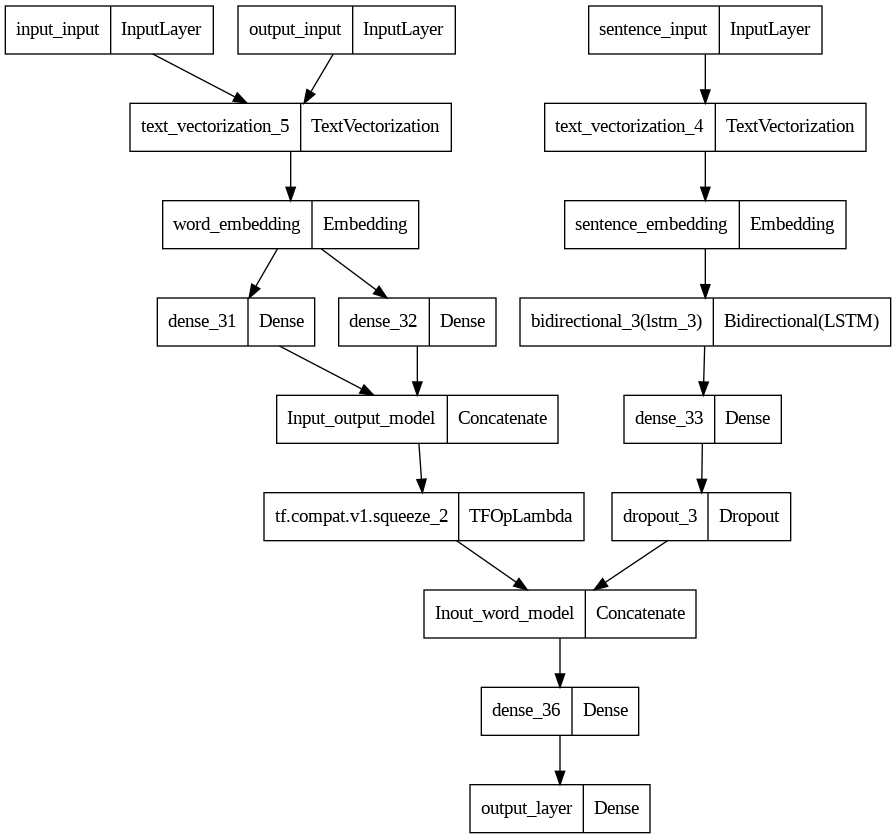

In [ ]:
input_inputs = layers.Input(shape=(1,), dtype=tf.string, name="input_input")
input_vectors = word_vectorizer(input_inputs)
input_embeddings = word_embedding(input_vectors)
input_dense = layers.Dense(64, activation="relu")(input_embeddings)
input_model = tf.keras.Model(inputs=input_inputs,
                             outputs=input_dense)

output_inputs = layers.Input(shape=(1,), dtype=tf.string, name="output_input")
output_vectors = word_vectorizer(output_inputs)
output_embeddings = word_embedding(output_vectors)
output_dense = layers.Dense(64, activation="relu")(output_embeddings)
output_model = tf.keras.Model(inputs=output_inputs,
                            outputs=output_dense)

input_output_concat = layers.Concatenate(name="Input_output_model")([input_model.output,
                                                                  output_model.output])
sq_input_output_concat = tf.squeeze(input_output_concat, axis=1)

sentence_inputs = layers.Input(shape=(1,), dtype="string", name="sentence_input")
sentence_vectors = sentence_vectorizer(sentence_inputs)
sentence_embeddings = sentence_embedding(sentence_vectors)
sentence_bi_lstm = layers.Bidirectional(layers.LSTM(32))(sentence_embeddings)
sentence_dense = layers.Dense(256, activation="relu")(sentence_bi_lstm)
sentence_drop = layers.Dropout(0.5)(sentence_dense)
sentence_model = tf.keras.Model(inputs=sentence_inputs,
                                outputs=sentence_drop)


word_sentence = layers.Concatenate(name="Inout_word_model")([sq_input_output_concat,
                                                               sentence_model.output])

word_dense = layers.Dense(64, activation="relu")(word_sentence)
word_dense = layers.Dense(32, activation="relu")(word_sentence)
word_dense = layers.Dense(16, activation="relu")(word_sentence)
output_layer = layers.Dense(1, activation="sigmoid", name="output_layer")(word_dense)


model_1 = tf.keras.Model(inputs=[input_model.input,
                                 output_model.input,
                                 sentence_model.input,],
                         outputs=output_layer)
plot_model(model_1)
#["the tree is green and tall", ["STATEMENT", ["tree"]], ["tree", ["and"]], ["and", ["green", "tall"]]]
# The sentence encoder

In [ ]:
model_1.compile(loss="binary_crossentropy",
                optimizer=tf.keras.optimizers.Adam(0.01),
                metrics=["accuracy"])


In [ ]:
in_out_word_data = tf.data.Dataset.from_tensor_slices((processed_data[2], processed_data[3], processed_data[0])) # make data
output_result_data = tf.data.Dataset.from_tensor_slices(processed_data[4]) # make labels
sentence_compactor_dataset = tf.data.Dataset.zip((in_out_word_data, output_result_data))
sentence_compactor_dataset = sentence_compactor_dataset.batch(32).prefetch(tf.data.AUTOTUNE)
sentence_compactor_dataset
val_in_out_word_data = tf.data.Dataset.from_tensor_slices((val_processed_data[2], val_processed_data[3], val_processed_data[0])) # make data
val_output_result_data = tf.data.Dataset.from_tensor_slices(val_processed_data[4]) # make labels
val_sentence_compactor_dataset = tf.data.Dataset.zip((val_in_out_word_data, val_output_result_data))
val_sentence_compactor_dataset = val_sentence_compactor_dataset.batch(32).prefetch(tf.data.AUTOTUNE)
val_sentence_compactor_dataset

<_PrefetchDataset element_spec=((TensorSpec(shape=(None,), dtype=tf.string, name=None), TensorSpec(shape=(None,), dtype=tf.string, name=None), TensorSpec(shape=(None,), dtype=tf.string, name=None)), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>

In [ ]:
model_1_history = model_1.fit(sentence_compactor_dataset, # train on dataset of token and characters
                              steps_per_epoch=int(.1 * len(sentence_compactor_dataset)),
                              epochs=5,
                              validation_data=val_sentence_compactor_dataset,
                              validation_steps=int(.1 * len(val_sentence_compactor_dataset))
                              )

Epoch 1/5
411/411 [==============================] - 33s 59ms/step - loss: 0.2438 - accuracy: 0.8849 - val_loss: 0.1279 - val_accuracy: 0.9502
Epoch 2/5
411/411 [==============================] - 19s 47ms/step - loss: 0.1141 - accuracy: 0.9578 - val_loss: 0.0888 - val_accuracy: 0.9678
Epoch 3/5
411/411 [==============================] - 20s 48ms/step - loss: 0.0741 - accuracy: 0.9728 - val_loss: 0.0619 - val_accuracy: 0.9828
Epoch 4/5
411/411 [==============================] - 21s 52ms/step - loss: 0.0587 - accuracy: 0.9805 - val_loss: 0.0666 - val_accuracy: 0.9807
Epoch 5/5
411/411 [==============================] - 20s 48ms/step - loss: 0.0645 - accuracy: 0.9781 - val_loss: 0.0433 - val_accuracy: 0.9864


In [ ]:
def pred_probs(model, dataset):
  model_pred_probs = model.predict(dataset, verbose=1)
  model_pred_probs
  model_preds = tf.round(model_pred_probs)
  model_preds
  model_results = calculate_results(y_true=val_processed_data[4],
                                    y_pred=model_preds)
  return model_results

In [ ]:
pred_probs(model_1, val_sentence_compactor_dataset)

1338/1338 [==============================] - 11s 7ms/step


{'accuracy': 98.5883562764391,
 'precision': 0.9869356762997202,
 'recall': 0.985883562764391,
 'f1': 0.9860958440014103}

In [ ]:
  model_1_pred_probs = model_1.predict(sentence_compactor_dataset, verbose=1)
  model_1_pred_probs
  model_1_preds = tf.round(model_1_pred_probs + success_odds -.5)
  model_1_preds
  model_1_results = calculate_results(y_true=processed_data[4],
                                    y_pred=model_1_preds)

4110/4110 [==============================] - 24s 6ms/step


In [ ]:
def senctence_compactor(model, sentence):
  data_output = []
  data_output.append(sentence)
  for a in range(sentence_length(sentence) + 1):
    if (a == 0):
     input_holder = "STATEMENT"
    else:
     input_holder = location_inword(a - 1, sentence)
    correct_holder = [input_holder, []]
    for b in range(sentence_length(sentence)):
        output_holder = location_inword(b, sentence)
        in_out_word_example = tf.data.Dataset.from_tensor_slices(([input_holder], [output_holder], [sentence])) # make data
        output_result_example = tf.data.Dataset.from_tensor_slices([0]) # make labels
        sentence_compactor_example = tf.data.Dataset.zip((in_out_word_example, output_result_example))
        sentence_compactor_example = sentence_compactor_example.batch(32).prefetch(tf.data.AUTOTUNE)
        sentence_compactor_example
        outcome = model.predict(sentence_compactor_example,verbose=None)
        if (outcome > success_odds):
         correct_holder[1].append(output_holder)
    if (correct_holder != [input_holder, []]):
      data_output.append(correct_holder)
  return data_output


In [ ]:
sentence = processed_data[0][random.randint(0, len(val_processed_data[0])-1)]
sentence

'Russia is the biggest contry in the world'

In [ ]:
sentence = "The trees are green"

# Model Decoder - decodes encoded data into sentences


In [ ]:
senctence_compactor(model_1, sentence)

['The trees are green', ['STATEMENT', ['trees']], ['trees', ['green']]]

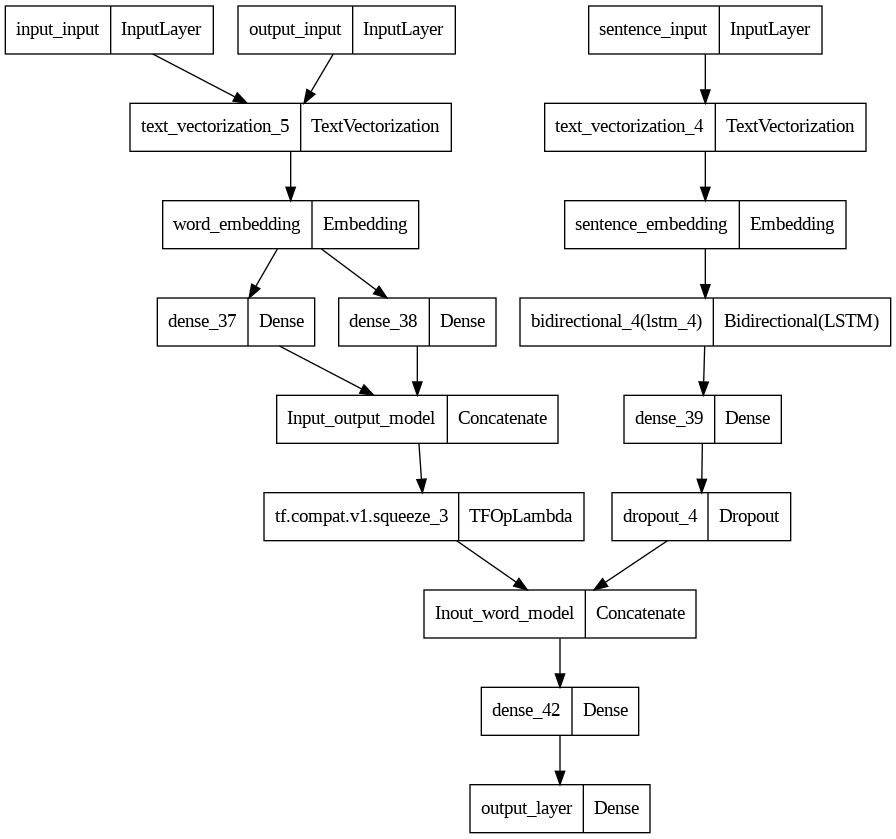

In [ ]:
input_inputs = layers.Input(shape=(1,), dtype=tf.string, name="input_input")
input_vectors = word_vectorizer(input_inputs)
input_embeddings = word_embedding(input_vectors)
input_dense = layers.Dense(64, activation="relu")(input_embeddings)
input_model = tf.keras.Model(inputs=input_inputs,
                             outputs=input_dense)

output_inputs = layers.Input(shape=(1,), dtype=tf.string, name="output_input")
output_vectors = word_vectorizer(output_inputs)
output_embeddings = word_embedding(output_vectors)
output_dense = layers.Dense(64, activation="relu")(output_embeddings)
output_model = tf.keras.Model(inputs=output_inputs,
                            outputs=output_dense)

input_output_concat = layers.Concatenate(name="Input_output_model")([input_model.output,
                                                                  output_model.output])
sq_input_output_concat = tf.squeeze(input_output_concat, axis=1)

sentence_inputs = layers.Input(shape=(1,), dtype="string", name="sentence_input")
sentence_vectors = sentence_vectorizer(sentence_inputs)
sentence_embeddings = sentence_embedding(sentence_vectors)
sentence_bi_lstm = layers.Bidirectional(layers.LSTM(32))(sentence_embeddings)
sentence_dense = layers.Dense(256, activation="relu")(sentence_bi_lstm)
sentence_drop = layers.Dropout(0.5)(sentence_dense)
sentence_model = tf.keras.Model(inputs=sentence_inputs,
                                outputs=sentence_drop)


word_sentence = layers.Concatenate(name="Inout_word_model")([sq_input_output_concat,
                                                               sentence_model.output])

word_dense = layers.Dense(64, activation="relu")(word_sentence)
word_dense = layers.Dense(32, activation="relu")(word_sentence)
word_dense = layers.Dense(16, activation="relu")(word_sentence)
output_layer = layers.Dense(1, activation="sigmoid", name="output_layer")(word_dense)


model_2 = tf.keras.Model(inputs=[input_model.input,
                                 output_model.input,
                                 sentence_model.input,],
                         outputs=output_layer)
plot_model(model_2)
# The sentence decoder

In [ ]:
def data_decombactor(data):
  previos_sentence_data = []
  decompacted_inputs = []
  decompacted_outputs = []
  data_input_holder = []
  data_output_holder = []
  decompactor_answers = []
  list_of_sentences = Extract(data, 0)
  for i in range(10):#-scales data amount
    for a in range(len(data)):#goes through each data point
      sentence_holder = "STARTWORD"
      previos_sentence_data.append(sentence_holder)
      data_input_holder = []
      data_output_holder = []
      for d in range(5):
        if (d < len(data[a]) - 1):
          data_input_holder.append(data[a][d + 1][0])
          output_sentence = ""
          for e in range(len(data[a][d + 1][1])):
            output_sentence = output_sentence + " " + data[a][d + 1][1][e]
          data_output_holder.append(output_sentence)
        else:
          data_output_holder.append("FILLER")
          data_input_holder.append("FILLER")
      decompacted_inputs.append(data_input_holder)
      decompacted_outputs.append(data_output_holder)
      decompactor_answers.append(location_inword(0, list_of_sentences[a]))
      for b in range(sentence_length(list_of_sentences[a])):
        sentence_holder = ""
        decompacted_inputs.append(data_input_holder)
        decompacted_outputs.append(data_output_holder)
        for c in range(b + 1):
          sentence_holder += " "
          sentence_holder += location_inword(c, list_of_sentences[a])
        if (b == sentence_length(list_of_sentences[a]) - 1):
          decompactor_answers.append("ENDSENTENCE")
        else:
          decompactor_answers.append(location_inword(b + 1, list_of_sentences[a]))
        previos_sentence_data.append(sentence_holder)


  return previos_sentence_data, decompacted_inputs, decompacted_outputs, decompactor_answers




#["the tree is green and tall", ["STATEMENT", ["tree"]], ["tree", ["and"]], ["and", ["green", "tall"]]]

In [ ]:
decompacted_data = data_decombactor(X_train)
decompacted_data[0][:10], decompacted_data[1][:10], decompacted_data[2][:10], decompacted_data[3][:10],

(['STARTWORD',
  ' have',
  ' have you',
  ' have you ever',
  ' have you ever played',
  ' have you ever played Minecraft',
  'STARTWORD',
  ' George',
  ' George Washington',
  ' George Washington was'],
 [['have', 'you', 'played', 'FILLER', 'FILLER'],
  ['have', 'you', 'played', 'FILLER', 'FILLER'],
  ['have', 'you', 'played', 'FILLER', 'FILLER'],
  ['have', 'you', 'played', 'FILLER', 'FILLER'],
  ['have', 'you', 'played', 'FILLER', 'FILLER'],
  ['have', 'you', 'played', 'FILLER', 'FILLER'],
  ['STATMENT', 'George', 'first', 'FILLER', 'FILLER'],
  ['STATMENT', 'George', 'first', 'FILLER', 'FILLER'],
  ['STATMENT', 'George', 'first', 'FILLER', 'FILLER'],
  ['STATMENT', 'George', 'first', 'FILLER', 'FILLER']],
 [[' you', ' played', ' Minecraft', 'FILLER', 'FILLER'],
  [' you', ' played', ' Minecraft', 'FILLER', 'FILLER'],
  [' you', ' played', ' Minecraft', 'FILLER', 'FILLER'],
  [' you', ' played', ' Minecraft', 'FILLER', 'FILLER'],
  [' you', ' played', ' Minecraft', 'FILLER', 'FILL

In [ ]:
words_in_vocab = word_input_vectorizer.get_vocabulary()

In [ ]:
decompacted_data = data_decombactor(X_train)
val_decompacted_data = data_decombactor(X_test)

extract1 = Extract(decompacted_data[1], 0)

In [ ]:
word_input_vectorizer(["world"])
def Extract_vec(lst):
    return [word_input_vectorizer([item]).numpy()[0][0] for item in lst]
exdecom = Extract_vec(decompacted_data[3])
val_exdecom = Extract_vec(val_decompacted_data[3])

In [ ]:
from sklearn.preprocessing import OneHotEncoder
decompact_1hot = tf.one_hot((exdecom), len(words_in_vocab))
decompact_1hot
val_decompact_1hot = tf.one_hot((val_exdecom), len(words_in_vocab))
val_decompact_1hot

<tf.Tensor: shape=(1590, 157), dtype=float32, numpy=
array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.]], dtype=float32)>

# Model QA Matcher - matches Questions with relivent Answer.


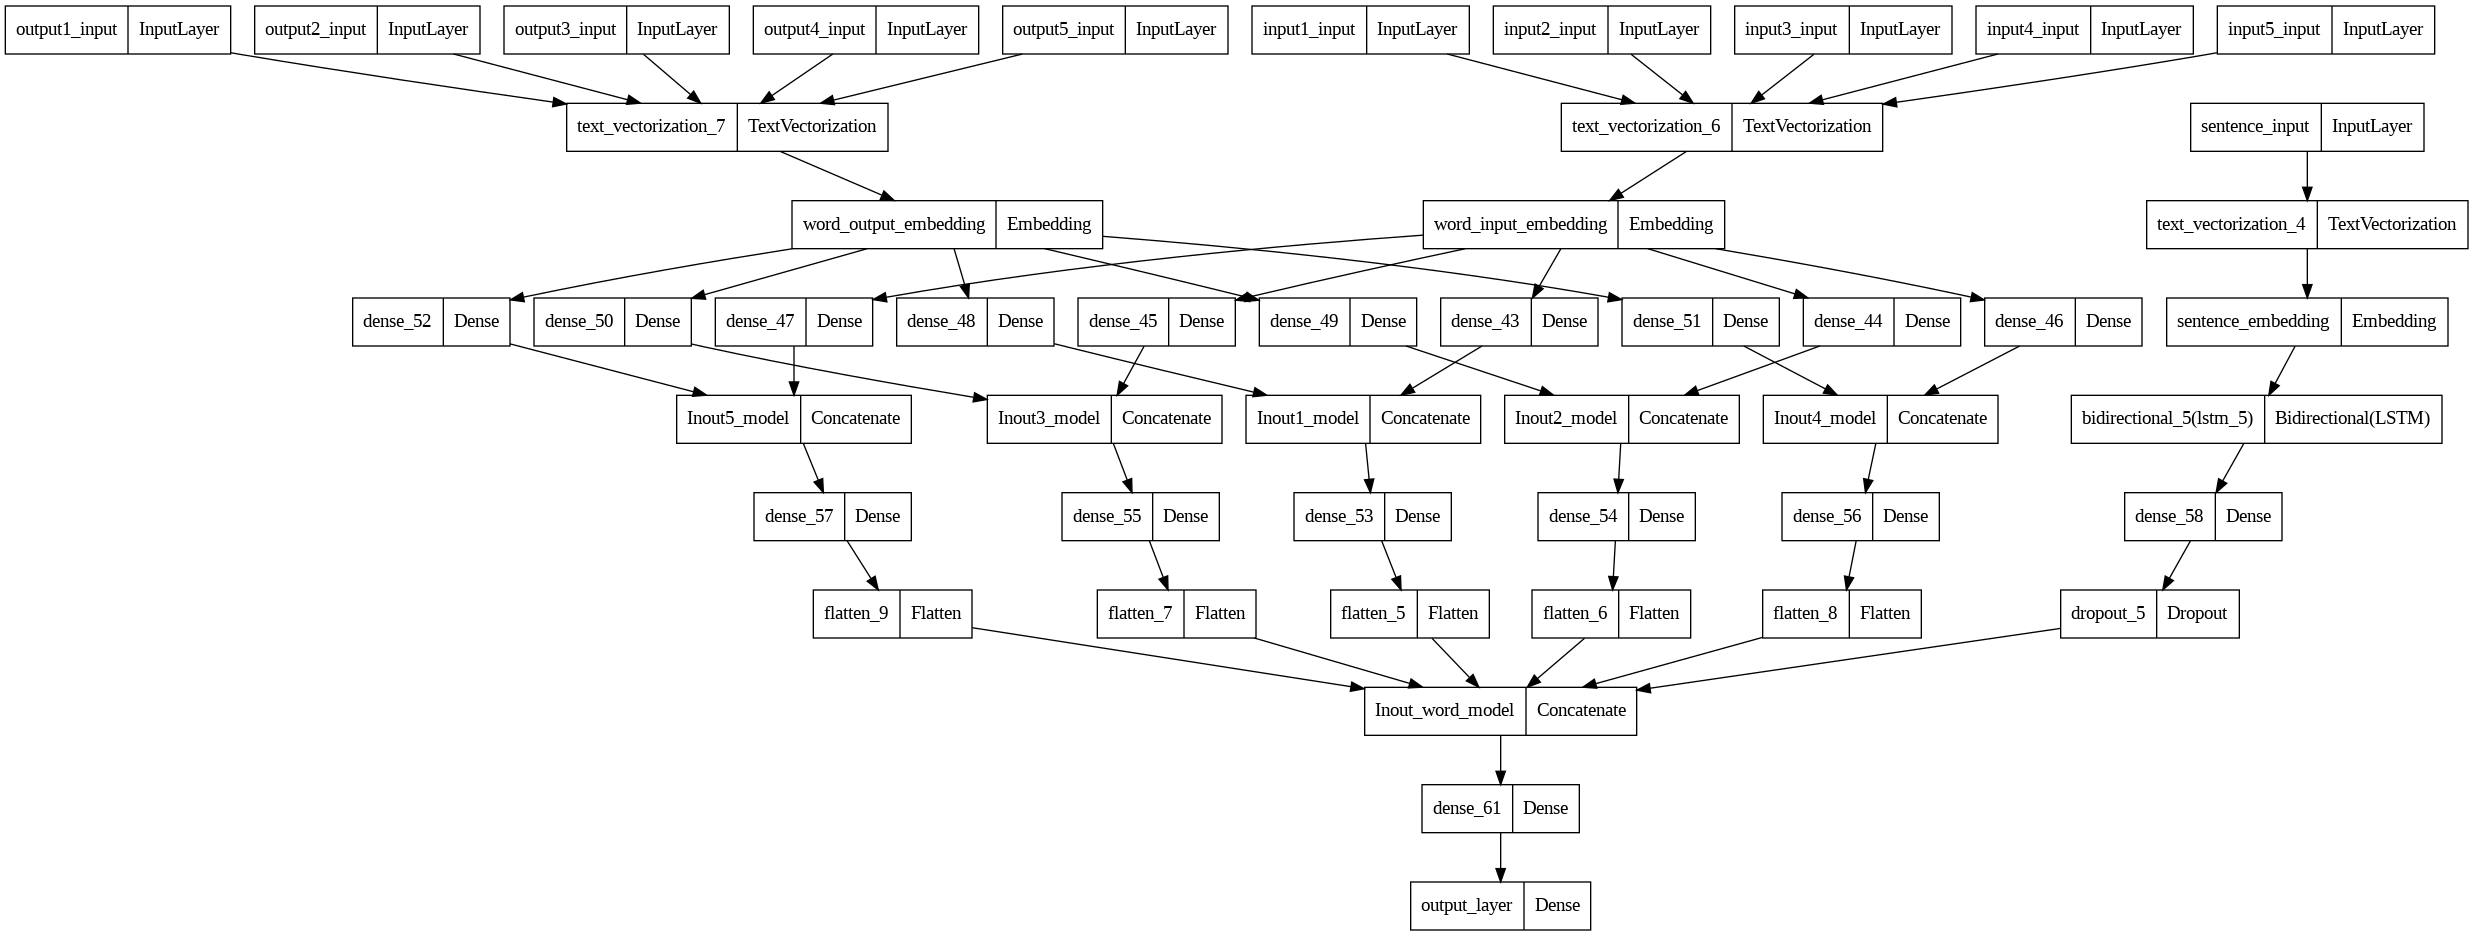

In [ ]:
#Inputs up to 15 previoswords, undefined amount [input, outpt-unp to 4]
#Outputs- word in embeding guess

input_inputs1 = layers.Input(shape=(1,), dtype=tf.string, name="input1_input")
input_inputs2 = layers.Input(shape=(1,), dtype=tf.string, name="input2_input")
input_inputs3 = layers.Input(shape=(1,), dtype=tf.string, name="input3_input")
input_inputs4 = layers.Input(shape=(1,), dtype=tf.string, name="input4_input")
input_inputs5 = layers.Input(shape=(1,), dtype=tf.string, name="input5_input")

output_inputs1 = layers.Input(shape=(1,), dtype=tf.string, name="output1_input")
output_inputs2 = layers.Input(shape=(1,), dtype=tf.string, name="output2_input")
output_inputs3 = layers.Input(shape=(1,), dtype=tf.string, name="output3_input")
output_inputs4 = layers.Input(shape=(1,), dtype=tf.string, name="output4_input")
output_inputs5 = layers.Input(shape=(1,), dtype=tf.string, name="output5_input")

input1_vectors = word_input_vectorizer(input_inputs1)
input1_embeddings = word_input_embedding(input1_vectors)
input2_vectors = word_input_vectorizer(input_inputs2)
input2_embeddings = word_input_embedding(input2_vectors)
input3_vectors = word_input_vectorizer(input_inputs3)
input3_embeddings = word_input_embedding(input3_vectors)
input4_vectors = word_input_vectorizer(input_inputs4)
input4_embeddings = word_input_embedding(input4_vectors)
input5_vectors = word_input_vectorizer(input_inputs5)
input5_embeddings = word_input_embedding(input5_vectors)

output1_vectors = word_output_vectorizer(output_inputs1)
output1_embeddings = word_output_embedding(output1_vectors)
output2_vectors = word_output_vectorizer(output_inputs2)
output2_embeddings = word_output_embedding(output2_vectors)
output3_vectors = word_output_vectorizer(output_inputs3)
output3_embeddings = word_output_embedding(output3_vectors)
output4_vectors = word_output_vectorizer(output_inputs4)
output4_embeddings = word_output_embedding(output4_vectors)
output5_vectors = word_output_vectorizer(output_inputs5)
output5_embeddings = word_output_embedding(output5_vectors)

input1_dense = layers.Dense(64, activation="relu")(input1_embeddings)
input2_dense = layers.Dense(64, activation="relu")(input2_embeddings)
input3_dense = layers.Dense(64, activation="relu")(input3_embeddings)
input4_dense = layers.Dense(64, activation="relu")(input4_embeddings)
input5_dense = layers.Dense(64, activation="relu")(input5_embeddings)

output1_dense = layers.Dense(64, activation="relu")(output1_embeddings)
output2_dense = layers.Dense(64, activation="relu")(output2_embeddings)
output3_dense = layers.Dense(64, activation="relu")(output3_embeddings)
output4_dense = layers.Dense(64, activation="relu")(output4_embeddings)
output5_dense = layers.Dense(64, activation="relu")(output5_embeddings)

input_model1 = tf.keras.Model(inputs=input_inputs1, outputs=input1_dense)
input_model2 = tf.keras.Model(inputs=input_inputs2, outputs=input2_dense)
input_model3 = tf.keras.Model(inputs=input_inputs3, outputs=input3_dense)
input_model4 = tf.keras.Model(inputs=input_inputs4, outputs=input4_dense)
input_model5 = tf.keras.Model(inputs=input_inputs5, outputs=input5_dense)

output_model1 = tf.keras.Model(inputs=output_inputs1, outputs=output1_dense)
output_model2 = tf.keras.Model(inputs=output_inputs2, outputs=output2_dense)
output_model3 = tf.keras.Model(inputs=output_inputs3, outputs=output3_dense)
output_model4 = tf.keras.Model(inputs=output_inputs4, outputs=output4_dense)
output_model5 = tf.keras.Model(inputs=output_inputs5, outputs=output5_dense)


inout1_concat = layers.Concatenate(name="Inout1_model")([input_model1.output, output_model1.output])
inout2_concat = layers.Concatenate(name="Inout2_model")([input_model2.output, output_model2.output])
inout3_concat = layers.Concatenate(name="Inout3_model")([input_model3.output, output_model3.output])
inout4_concat = layers.Concatenate(name="Inout4_model")([input_model4.output, output_model4.output])
inout5_concat = layers.Concatenate(name="Inout5_model")([input_model5.output, output_model5.output])

inout1_dense = layers.Dense(64, activation="relu")(inout1_concat)
inout2_dense = layers.Dense(64, activation="relu")(inout2_concat)
inout3_dense = layers.Dense(64, activation="relu")(inout3_concat)
inout4_dense = layers.Dense(64, activation="relu")(inout4_concat)
inout5_dense = layers.Dense(64, activation="relu")(inout5_concat)

inout1_flatten = layers.Flatten()(inout1_dense)
inout2_flatten = layers.Flatten()(inout2_dense)
inout3_flatten = layers.Flatten()(inout3_dense)
inout4_flatten = layers.Flatten()(inout4_dense)
inout5_flatten = layers.Flatten()(inout5_dense)

sentence_inputs = layers.Input(shape=(1,), dtype="string", name="sentence_input")
sentence_vectors = sentence_vectorizer(sentence_inputs)
sentence_embeddings = sentence_embedding(sentence_vectors)
sentence_bi_lstm = layers.Bidirectional(layers.LSTM(32))(sentence_embeddings)
sentence_dense = layers.Dense(256, activation="relu")(sentence_bi_lstm)
sentence_drop = layers.Dropout(0.5)(sentence_dense)
sentence_model = tf.keras.Model(inputs=sentence_inputs,
                                outputs=sentence_drop)

word_sentence = layers.Concatenate(name="Inout_word_model")([inout1_flatten,
                                                             inout2_flatten,
                                                             inout3_flatten,
                                                             inout4_flatten,
                                                             inout5_flatten,
                                                              sentence_model.output])

word_dense = layers.Dense(64, activation="relu")(word_sentence)
word_dense = layers.Dense(32, activation="relu")(word_sentence)
word_dense = layers.Dense(32, activation="relu")(word_sentence)
output_layer = layers.Dense(len(words_in_vocab), activation="softmax", name="output_layer")(word_dense)


model_2 = tf.keras.Model(inputs=[input_model1.input,
                                 output_model1.input,
                                 input_model2.input,
                                 output_model2.input,
                                 input_model3.input,
                                 output_model3.input,
                                 input_model4.input,
                                 output_model4.input,
                                 input_model5.input,
                                 output_model5.input,
                                 sentence_model.input],
                         outputs=output_layer)

plot_model(model_2)
#previos words



#input
#output
#input output concate
#| rectent neral netork
# previos words

#dense
#


#"the tree is green and tall", ["STATEMENT", ["tree"]], ["tree", ["and"]], ["and", ["green", "tall"]]]
# The sentence encoder

In [ ]:
model_2.compile(loss="categorical_crossentropy",
                optimizer=tf.keras.optimizers.Adam(0.01),
                metrics=["accuracy"])

In [ ]:
the_11_data = tf.data.Dataset.from_tensor_slices((Extract(decompacted_data[1], 0),
            Extract(decompacted_data[2], 0),
            Extract(decompacted_data[1], 1),
            Extract(decompacted_data[2], 1),
            Extract(decompacted_data[1], 2),
            Extract(decompacted_data[2], 2),
            Extract(decompacted_data[1], 3),
            Extract(decompacted_data[2], 3),
            Extract(decompacted_data[1], 4),
            Extract(decompacted_data[2], 4),
            decompacted_data[0])) # make data
output_result_dedata = tf.data.Dataset.from_tensor_slices(decompact_1hot) # make labels
sentence_decompactor_dataset = tf.data.Dataset.zip((the_11_data, output_result_dedata))
sentence_decompactor_dataset = sentence_decompactor_dataset.batch(32).prefetch(tf.data.AUTOTUNE)
sentence_decompactor_dataset
val_the_11_data = tf.data.Dataset.from_tensor_slices((Extract(val_decompacted_data[1], 0),
            Extract(val_decompacted_data[2], 0),
            Extract(val_decompacted_data[1], 1),
            Extract(val_decompacted_data[2], 1),
            Extract(val_decompacted_data[1], 2),
            Extract(val_decompacted_data[2], 2),
            Extract(val_decompacted_data[1], 3),
            Extract(val_decompacted_data[2], 3),
            Extract(val_decompacted_data[1], 4),
            Extract(val_decompacted_data[2], 4),
            val_decompacted_data[0])) # make data
val_output_result_dedata = tf.data.Dataset.from_tensor_slices(val_decompact_1hot) # make labels
val_sentence_decompactor_dataset = tf.data.Dataset.zip((val_the_11_data, val_output_result_dedata))
val_sentence_decompactor_dataset = val_sentence_decompactor_dataset.batch(32).prefetch(tf.data.AUTOTUNE)
val_sentence_decompactor_dataset

<_PrefetchDataset element_spec=((TensorSpec(shape=(None,), dtype=tf.string, name=None), TensorSpec(shape=(None,), dtype=tf.string, name=None), TensorSpec(shape=(None,), dtype=tf.string, name=None), TensorSpec(shape=(None,), dtype=tf.string, name=None), TensorSpec(shape=(None,), dtype=tf.string, name=None), TensorSpec(shape=(None,), dtype=tf.string, name=None), TensorSpec(shape=(None,), dtype=tf.string, name=None), TensorSpec(shape=(None,), dtype=tf.string, name=None), TensorSpec(shape=(None,), dtype=tf.string, name=None), TensorSpec(shape=(None,), dtype=tf.string, name=None), TensorSpec(shape=(None,), dtype=tf.string, name=None)), TensorSpec(shape=(None, 157), dtype=tf.float32, name=None))>

In [ ]:
model_2_history = model_2.fit(sentence_decompactor_dataset,
                              steps_per_epoch=int(1 * len(sentence_decompactor_dataset)),
                              validation_data=val_sentence_decompactor_dataset,
                              validation_steps=int(1 * len(val_sentence_decompactor_dataset)),
                              epochs=10)

Epoch 1/10
149/149 [==============================] - 26s 91ms/step - loss: 2.5806 - accuracy: 0.4057 - val_loss: 1.0662 - val_accuracy: 0.6730
Epoch 2/10
149/149 [==============================] - 11s 74ms/step - loss: 0.9411 - accuracy: 0.7078 - val_loss: 0.4850 - val_accuracy: 0.8113
Epoch 3/10
149/149 [==============================] - 10s 66ms/step - loss: 0.6348 - accuracy: 0.8091 - val_loss: 0.5864 - val_accuracy: 0.8365
Epoch 4/10
149/149 [==============================] - 11s 71ms/step - loss: 0.6091 - accuracy: 0.8388 - val_loss: 0.1132 - val_accuracy: 0.9560
Epoch 5/10
149/149 [==============================] - 11s 75ms/step - loss: 0.2508 - accuracy: 0.9245 - val_loss: 0.1039 - val_accuracy: 0.9560
Epoch 6/10
149/149 [==============================] - 11s 72ms/step - loss: 0.4855 - accuracy: 0.8941 - val_loss: 0.2230 - val_accuracy: 0.9119
Epoch 7/10
149/149 [==============================] - 11s 74ms/step - loss: 0.8093 - accuracy: 0.8304 - val_loss: 0.3211 - val_accuracy:

In [ ]:
outcomes = [Extract(decompacted_data[1], 0)[10],
            Extract(decompacted_data[2], 0)[10],
            Extract(decompacted_data[1], 1)[10],
            Extract(decompacted_data[2], 1)[10],
            Extract(decompacted_data[1], 2)[10],
            Extract(decompacted_data[2], 2)[10],
            Extract(decompacted_data[1], 3)[10],
            Extract(decompacted_data[2], 3)[10],
            Extract(decompacted_data[1], 4)[10],
            Extract(decompacted_data[2], 4)[10],
            decompacted_data[0][10]]


In [ ]:
the_11_data_example = tf.data.Dataset.from_tensor_slices((Extract(decompacted_data[1], 0),
            Extract(decompacted_data[2], 0),
            Extract(decompacted_data[1], 1),
            Extract(decompacted_data[2], 1),
            Extract(decompacted_data[1], 2),
            Extract(decompacted_data[2], 2),
            Extract(decompacted_data[1], 3),
            Extract(decompacted_data[2], 3),
            Extract(decompacted_data[1], 4),
            Extract(decompacted_data[2], 4),
            decompacted_data[0]))
output_result_example = tf.data.Dataset.from_tensor_slices(decompact_1hot[0]) # make labels
sentence_compactor_example = tf.data.Dataset.zip((the_11_data_example, output_result_example))
sentence_compactor_example = sentence_compactor_example.batch(32).prefetch(tf.data.AUTOTUNE)
sentence_compactor_example

<_PrefetchDataset element_spec=((TensorSpec(shape=(None,), dtype=tf.string, name=None), TensorSpec(shape=(None,), dtype=tf.string, name=None), TensorSpec(shape=(None,), dtype=tf.string, name=None), TensorSpec(shape=(None,), dtype=tf.string, name=None), TensorSpec(shape=(None,), dtype=tf.string, name=None), TensorSpec(shape=(None,), dtype=tf.string, name=None), TensorSpec(shape=(None,), dtype=tf.string, name=None), TensorSpec(shape=(None,), dtype=tf.string, name=None), TensorSpec(shape=(None,), dtype=tf.string, name=None), TensorSpec(shape=(None,), dtype=tf.string, name=None), TensorSpec(shape=(None,), dtype=tf.string, name=None)), TensorSpec(shape=(None,), dtype=tf.float32, name=None))>

In [ ]:
def data_decombactor_un(data, a):
  decompacted_inputs = []
  decompacted_outputs = []
  data_input_holder = []
  data_output_holder = []
  decompactor_answers = []
  list_of_sentences = Extract(data, 0)
  data_input_holder = []
  data_output_holder = []
  for d in range(5):
    if (d < len(data[a]) - 1):
      data_input_holder.append(data[a][d + 1][0])
      output_sentence = ""
      for e in range(len(data[a][d + 1][1])):
        output_sentence = output_sentence + " " + data[a][d + 1][1][e]
      data_output_holder.append(output_sentence)
    else:
      data_output_holder.append("FILLER")
      data_input_holder.append("FILLER")
  decompacted_inputs.append(data_input_holder)
  decompacted_outputs.append(data_output_holder)
  decompactor_answers.append(location_inword(0, list_of_sentences[a]))
  for b in range(sentence_length(list_of_sentences[a])):
    sentence_holder = ""
    decompacted_inputs.append(data_input_holder)
    decompacted_outputs.append(data_output_holder)
    for c in range(b + 1):
      sentence_holder += " "
      sentence_holder += location_inword(c, list_of_sentences[a])
    if (b == sentence_length(list_of_sentences[a]) - 1):
      decompactor_answers.append("ENDSENTENCE")
    else:
      decompactor_answers.append(location_inword(b + 1, list_of_sentences[a]))


  return decompacted_inputs, decompacted_outputs, decompactor_answers

In [ ]:
data_decompacted = data_decombactor_un(X_train, 1)
data_decompacted[0][0][0]

'STATEMENT'

In [ ]:
Extract(decompacted_data[2], 4)[0]
[data_decompacted[1][0][0]], [data_decompacted[1][0][1]], [data_decompacted[1][0][2]],

([' I'], [' love'], [' oranges'])

In [ ]:
np.argmax(model_2.predict(sentence_compactor_example,verbose=None), axis=1)


array([ 59,   4,   3,  25,  71,  18,   3,  20,   1,   7,  15,  36,   1,
         5,   4,  67,   1,  12,  80,   3,  25,  65,  18,   3,  20,   1,
         7,  15,  12,   1,   5,  34,  52,  32,   1,   7,  45,   3,  22,
         1,  12,   4, 154,   1,  23,  39, 123,  11, 133,   1,   3,  48,
         4,  33,   9,  38,  79,   1, 141,  40,  57,   1,  14,  17, 126,
        50,   1, 125,  40, 139,  55,   1,   6,   8,  19,  13, 104,   3,
       105,   1,   3,  29,  58,  10,  11,  56,  24,  18,  12,   1,  28,
         4,  44,   1,   8,   6, 152,   1,   7,  15,  26,   1,   5,  34,
        52,  32,   1,  12,   4,  11,  20, 114,   1,  14,  37,  77,  83,
        27,  16,  26,   1,   5,   4,   3, 119, 131,   1,   3,  49,   4,
        88,   9,  47,  38,   1,   8,   6,  11, 140,   1,  54,  62,   4,
        48,   1,   8,   6,  11, 111,   9, 120,   1,   6,   8,  19,  13,
       108])

In [ ]:
words_in_vocab[1]

'[UNK]'

In [ ]:
decompact_1hot[0]

<tf.Tensor: shape=(157,), dtype=float32, numpy=
array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0.], dtype=float32)>

In [ ]:
def dedatafy_words(data, num):
  data_decompacted = data_decombactor_un(data, num)
  end = False
  current_sentence = "STARTWORD"
  actual_sentence = Extract(data, 0)[num]
  count = 0
  while(end == False and count < 8):
    the_11_data_example = tf.data.Dataset.from_tensor_slices(([data_decompacted[0][0][0]],
            [data_decompacted[1][0][0]],
            [data_decompacted[0][0][1]],
            [data_decompacted[1][0][1]],
            [data_decompacted[0][0][2]],
            [data_decompacted[1][0][2]],
            [data_decompacted[0][0][3]],
            [data_decompacted[1][0][3]],
            [data_decompacted[0][0][4]],
            [data_decompacted[1][0][4]],
            [current_sentence]))
    output_result_example = tf.data.Dataset.from_tensor_slices([decompact_1hot[0]]) # make labels
    sentence_compactor_example = tf.data.Dataset.zip((the_11_data_example, output_result_example))
    sentence_compactor_example = sentence_compactor_example.batch(32).prefetch(tf.data.AUTOTUNE)
    sentence_compactor_example
    vector_word = np.argmax(model_2.predict(sentence_compactor_example, verbose=None), axis=1)[0]
    count = count + 1
    if (vector_word == 1):
      end == True
    else:
      word_picked = words_in_vocab[vector_word]
      if (current_sentence == "STARTWORD"):
        current_sentence = word_picked
      else:
        current_sentence = current_sentence + " " + word_picked
  return current_sentence, actual_sentence

In [ ]:
def dedatafy_tester_words(data, num):
  data_decompacted = data_decombactor_un(data, num)
  end = False
  current_sentence = "STARTWORD"
  actual_sentence = Extract(data, 0)[num]
  count = 0
  Sentence_correctness = []
  while(end == False and count < 12):
    the_11_data_example = tf.data.Dataset.from_tensor_slices(([data_decompacted[0][0][0]],
            [data_decompacted[1][0][0]],
            [data_decompacted[0][0][1]],
            [data_decompacted[1][0][1]],
            [data_decompacted[0][0][2]],
            [data_decompacted[1][0][2]],
            [data_decompacted[0][0][3]],
            [data_decompacted[1][0][3]],
            [data_decompacted[0][0][4]],
            [data_decompacted[1][0][4]],
            [current_sentence]))
    output_result_example = tf.data.Dataset.from_tensor_slices([decompact_1hot[0]]) # make labels
    sentence_compactor_example = tf.data.Dataset.zip((the_11_data_example, output_result_example))
    sentence_compactor_example = sentence_compactor_example.batch(32).prefetch(tf.data.AUTOTUNE)
    sentence_compactor_example
    vector_word = np.argmax(model_2.predict(sentence_compactor_example,verbose=None), axis=1)[0]
    count = count + 1
    word_picked = words_in_vocab[vector_word]
    if (len(data_decompacted[2]) > count):
      if (current_sentence == "STARTWORD"):
        current_sentence = data_decompacted[2][count - 1]
      else:
        current_sentence = current_sentence + " " + data_decompacted[2][count - 1]
      if (data_decompacted[2][count - 1].lower() == word_picked):
        Sentence_correctness.append("S")
      else:
        print(data_decompacted[2][count - 1])
        print(word_picked)
        Sentence_correctness.append("F")
  return current_sentence, actual_sentence, Sentence_correctness

In [ ]:
for i in range(10):
  decoded_words = dedatafy_words(X_train, i)
  print(i + 1)
  print("AI:" + decoded_words[0])
  print("Actual:" + decoded_words[1])

1
AI:russia is the biggest contry in the world
Actual:Russia is the biggest contry in the world
2
AI:i love oranges
Actual:I love oranges
3
AI:when is winter
Actual:When is winter
4
AI:america has the biggest economy in the world
Actual:America has the biggest economy in the world
5
AI:i love america
Actual:I love America
6
AI:when will spring end
Actual:When will spring end
7
AI:i hate the sky
Actual:I hate the sky
8
AI:america is awesome
Actual:America is awesome
9
AI:we should get a job
Actual:We should get a job
10
AI:the grass is green and well kept
Actual:the grass is green and well kept


In [ ]:
X_train[4]

['I love America',
 ['STATEMENT', ['I']],
 ['I', ['love']],
 ['love', ['America']]]

In [ ]:
for i in range(40):
  print(i)
  decoded_words_test = dedatafy_tester_words(X_train, i)
  print("Actual:" + decoded_words_test[1])
  print(decoded_words_test[2])

0
Actual:Russia is the biggest contry in the world
['S', 'S', 'S', 'S', 'S', 'S', 'S', 'S']
1
Actual:I love oranges
['S', 'S', 'S']
2
Actual:When is winter
['S', 'S', 'S']
3
Actual:America has the biggest economy in the world
['S', 'S', 'S', 'S', 'S', 'S', 'S', 'S']
4
Actual:I love America
['S', 'S', 'S']
5
Actual:When will spring end
['S', 'S', 'S', 'S']
6
Actual:I hate the sky
['S', 'S', 'S', 'S']
7
Actual:America is awesome
['S', 'S', 'S']
8
Actual:We should get a job
['S', 'S', 'S', 'S', 'S']
9
Actual:the grass is green and well kept
['S', 'S', 'S', 'S', 'S', 'S', 'S']
10
Actual:Cars are fast
['S', 'S', 'S']
11
Actual:Why did Rome fall
['S', 'S', 'S', 'S']
12
Actual:thier are no houses
['S', 'S', 'S', 'S']
13
Actual:have you ever played magic the gathering
['S', 'S', 'S', 'S', 'S', 'S', 'S']
14
Actual:The great depretion was a awful time in America
['S', 'S', 'S', 'S', 'S', 'S', 'S', 'S', 'S']
15
Actual:pizza is tasty
['S', 'S', 'S']
16
Actual:You have friends
['S', 'S', 'S']
17
ca

In [ ]:
data_decompacted[2][0]

'I'

In [ ]:
Question_Answer = [
    ["Who was the first president", "George Washington was the first American President"],
    ["Who was the 16th president", "the 16th president is Abraham Lincon"],
    ["What color is the sky", "the sky is blue"],
    ["What color are oranges", "oranges are orange"],
    ["What color is grass", "grass is green"],
    ["What is the color of grass", "grass is green"],
    ["What is the color of the sky", "the sky is blue"],
    ["What color are trees", "trees are green"],
    ["When does school end", "School ends friday"],
    ["What was the first big empire", "Britian was the first great empire"],
    ["happy new year", "happy new year"]
]

In [ ]:
def Qusetion_answer_sorted(data):
  Question_input_big = []
  Answer_input_big = []
  Question_output_big = []
  Answer_outputs_big = []
  QA_correct = []
  Question_holder = []
  Answer_holder = []
  Question_inputs = []
  Question_outputs = []
  Answer_inputs = []
  Answer_outputs = []
  for i in range(len(data)):
    Question_holder = [senctence_compactor(model_1, data[i][0])]
    Answer_holder = [senctence_compactor(model_1, data[i][1])]
    Question_inputs.append(data_decombactor(Question_holder)[1][0])
    Question_outputs.append(data_decombactor(Question_holder)[2][0])
    Answer_inputs.append(data_decombactor(Answer_holder)[1][0])
    Answer_outputs.append(data_decombactor(Answer_holder)[2][0])
    print(Answer_holder)
  for i in range (12):
    for a in range(len(data)):
      for b in range(len(data)):
        if (data[b][1] == data[a][1]):
          Question_input_big.append(Question_inputs[a])
          Answer_input_big.append(Answer_inputs[b])
          Question_output_big.append(Question_outputs[a])
          Answer_outputs_big.append(Answer_outputs[b])
          QA_correct.append(1)
        elif(20 >= random.randint(1, 100)):
          Question_input_big.append(Question_inputs[a])
          Answer_input_big.append(Answer_inputs[b])
          Question_output_big.append(Question_outputs[a])
          Answer_outputs_big.append(Answer_outputs[b])
          QA_correct.append(0)
  return Question_input_big, Answer_input_big, Question_output_big, Answer_outputs_big, QA_correct

In [ ]:
Question_answer_data = Qusetion_answer_sorted(Question_Answer)
Question_answer_data[0][:10], Question_answer_data[1][:10], Question_answer_data[2][:10], len(Question_answer_data[3]), len(Question_answer_data[4])

[['George Washington was the first American President', ['George', ['first']], ['first', ['Washington', 'American', 'President']]]]
[['the 16th president is Abraham Lincon', ['16th', ['president', 'Lincon']], ['Abraham', ['16th']], ['Lincon', ['16th', 'Lincon']]]]
[['the sky is blue', ['STATEMENT', ['sky']], ['sky', ['blue']]]]
[['oranges are orange', ['STATEMENT', ['orange']]]]
[['grass is green', ['STATEMENT', ['grass']]]]
[['grass is green', ['STATEMENT', ['grass']]]]
[['the sky is blue', ['STATEMENT', ['sky']], ['sky', ['blue']]]]
[['trees are green', ['STATEMENT', ['trees']], ['trees', ['green']]]]
[['School ends friday', ['ends', ['ends', 'friday']], ['friday', ['ends', 'friday']]]]
[['Britian was the first great empire', ['STATEMENT', ['great']], ['Britian', ['first']], ['first', ['empire']], ['empire', ['first', 'great']]]]
[['happy new year']]


([['Who', 'first', 'FILLER', 'FILLER', 'FILLER'],
  ['Who', 'first', 'FILLER', 'FILLER', 'FILLER'],
  ['Who', '16th', 'FILLER', 'FILLER', 'FILLER'],
  ['Who', '16th', 'FILLER', 'FILLER', 'FILLER'],
  ['Who', '16th', 'FILLER', 'FILLER', 'FILLER'],
  ['Who', '16th', 'FILLER', 'FILLER', 'FILLER'],
  ['Who', '16th', 'FILLER', 'FILLER', 'FILLER'],
  ['Who', '16th', 'FILLER', 'FILLER', 'FILLER'],
  ['What', 'sky', 'FILLER', 'FILLER', 'FILLER'],
  ['What', 'sky', 'FILLER', 'FILLER', 'FILLER']],
 [['George', 'first', 'FILLER', 'FILLER', 'FILLER'],
  ['STATEMENT', 'sky', 'FILLER', 'FILLER', 'FILLER'],
  ['George', 'first', 'FILLER', 'FILLER', 'FILLER'],
  ['16th', 'Abraham', 'Lincon', 'FILLER', 'FILLER'],
  ['STATEMENT', 'FILLER', 'FILLER', 'FILLER', 'FILLER'],
  ['STATEMENT', 'FILLER', 'FILLER', 'FILLER', 'FILLER'],
  ['STATEMENT', 'trees', 'FILLER', 'FILLER', 'FILLER'],
  ['FILLER', 'FILLER', 'FILLER', 'FILLER', 'FILLER'],
  ['STATEMENT', 'sky', 'FILLER', 'FILLER', 'FILLER'],
  ['STATEMENT', 

In [ ]:
  Question = []
  Answer = []
  QA_correct = []
  Question_holder = []
  Answer_holder = []
  Question_inputs = []
  Question_outputs = []
  Answer_inputs = []
  Answer_outputs = []
  for i in range(2):
    Question_holder = [senctence_compactor(model_1, Question_Answer[i][0])]
    Answer_holder = [senctence_compactor(model_1, Question_Answer[i][1])]
    Question_inputs.append(data_decombactor(Question_holder)[1][0])
    Question_outputs.append(data_decombactor(Question_holder)[2][0])
    Answer_inputs.append(data_decombactor(Answer_holder)[1][0])
    Answer_outputs.append(data_decombactor(Answer_holder)[2][0])
Question_inputs[1], Question_outputs[1], Answer_inputs[1], Answer_outputs[1]


(['Who', '16th', 'FILLER', 'FILLER', 'FILLER'],
 [' the president', ' president', 'FILLER', 'FILLER', 'FILLER'],
 ['16th', 'Abraham', 'Lincon', 'FILLER', 'FILLER'],
 [' president Lincon', ' 16th', ' 16th Lincon', 'FILLER', 'FILLER'])

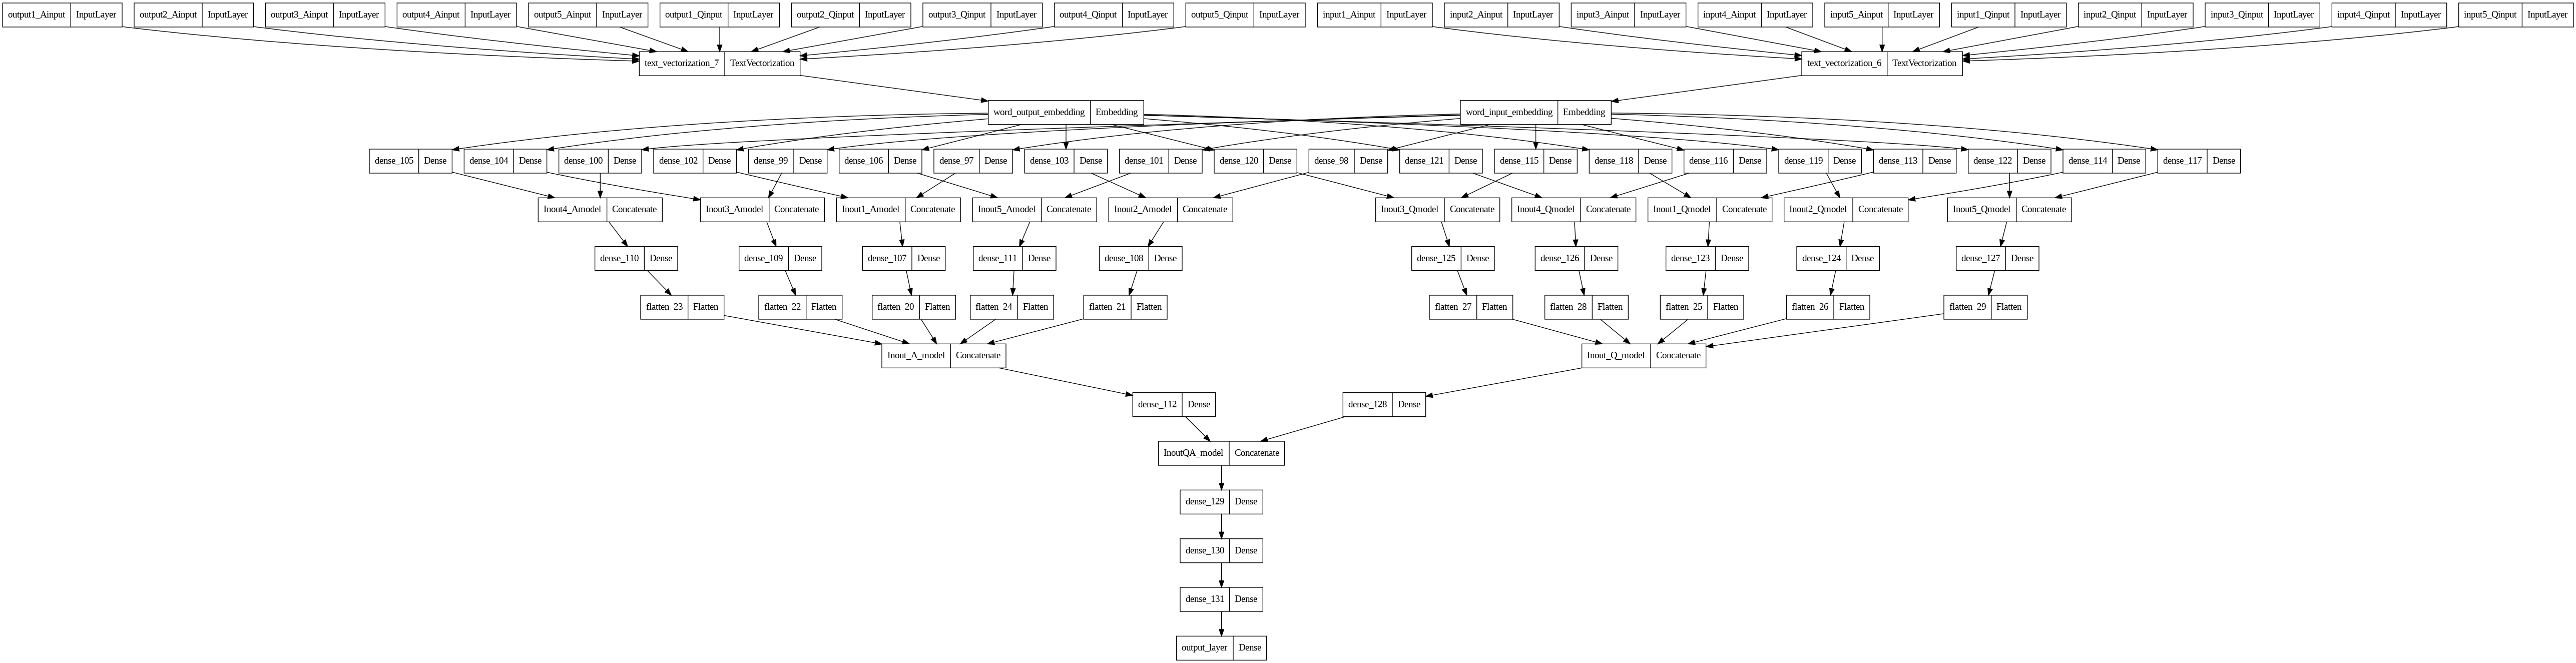

In [ ]:
inputA_inputs1 = layers.Input(shape=(1,), dtype=tf.string, name="input1_Ainput")
inputA_inputs2 = layers.Input(shape=(1,), dtype=tf.string, name="input2_Ainput")
inputA_inputs3 = layers.Input(shape=(1,), dtype=tf.string, name="input3_Ainput")
inputA_inputs4 = layers.Input(shape=(1,), dtype=tf.string, name="input4_Ainput")
inputA_inputs5 = layers.Input(shape=(1,), dtype=tf.string, name="input5_Ainput")

outputA_inputs1 = layers.Input(shape=(1,), dtype=tf.string, name="output1_Ainput")
outputA_inputs2 = layers.Input(shape=(1,), dtype=tf.string, name="output2_Ainput")
outputA_inputs3 = layers.Input(shape=(1,), dtype=tf.string, name="output3_Ainput")
outputA_inputs4 = layers.Input(shape=(1,), dtype=tf.string, name="output4_Ainput")
outputA_inputs5 = layers.Input(shape=(1,), dtype=tf.string, name="output5_Ainput")

input1_Avectors = word_input_vectorizer(inputA_inputs1)
input1_Aembeddings = word_input_embedding(input1_Avectors)
input2_Avectors = word_input_vectorizer(inputA_inputs2)
input2_Aembeddings = word_input_embedding(input2_Avectors)
input3_Avectors = word_input_vectorizer(inputA_inputs3)
input3_Aembeddings = word_input_embedding(input3_Avectors)
input4_Avectors = word_input_vectorizer(inputA_inputs4)
input4_Aembeddings = word_input_embedding(input4_Avectors)
input5_Avectors = word_input_vectorizer(inputA_inputs5)
input5_Aembeddings = word_input_embedding(input5_Avectors)

output1_Avectors = word_output_vectorizer(outputA_inputs1)
output1_Aembeddings = word_output_embedding(output1_Avectors)
output2_Avectors = word_output_vectorizer(outputA_inputs2)
output2_Aembeddings = word_output_embedding(output2_Avectors)
output3_Avectors = word_output_vectorizer(outputA_inputs3)
output3_Aembeddings = word_output_embedding(output3_Avectors)
output4_Avectors = word_output_vectorizer(outputA_inputs4)
output4_Aembeddings = word_output_embedding(output4_Avectors)
output5_Avectors = word_output_vectorizer(outputA_inputs5)
output5_Aembeddings = word_output_embedding(output5_Avectors)

input1_Adense = layers.Dense(64, activation="relu")(input1_Aembeddings)
input2_Adense = layers.Dense(64, activation="relu")(input2_Aembeddings)
input3_Adense = layers.Dense(64, activation="relu")(input3_Aembeddings)
input4_Adense = layers.Dense(64, activation="relu")(input4_Aembeddings)
input5_Adense = layers.Dense(64, activation="relu")(input5_Aembeddings)

output1_Adense = layers.Dense(64, activation="relu")(output1_Aembeddings)
output2_Adense = layers.Dense(64, activation="relu")(output2_Aembeddings)
output3_Adense = layers.Dense(64, activation="relu")(output3_Aembeddings)
output4_Adense = layers.Dense(64, activation="relu")(output4_Aembeddings)
output5_Adense = layers.Dense(64, activation="relu")(output5_Aembeddings)

inputA_model1 = tf.keras.Model(inputs=inputA_inputs1, outputs=input1_Adense)
inputA_model2 = tf.keras.Model(inputs=inputA_inputs2, outputs=input2_Adense)
inputA_model3 = tf.keras.Model(inputs=inputA_inputs3, outputs=input3_Adense)
inputA_model4 = tf.keras.Model(inputs=inputA_inputs4, outputs=input4_Adense)
inputA_model5 = tf.keras.Model(inputs=inputA_inputs5, outputs=input5_Adense)

outputA_model1 = tf.keras.Model(inputs=outputA_inputs1, outputs=output1_Adense)
outputA_model2 = tf.keras.Model(inputs=outputA_inputs2, outputs=output2_Adense)
outputA_model3 = tf.keras.Model(inputs=outputA_inputs3, outputs=output3_Adense)
outputA_model4 = tf.keras.Model(inputs=outputA_inputs4, outputs=output4_Adense)
outputA_model5 = tf.keras.Model(inputs=outputA_inputs5, outputs=output5_Adense)


inout1_concatA = layers.Concatenate(name="Inout1_Amodel")([inputA_model1.output, outputA_model1.output])
inout2_concatA = layers.Concatenate(name="Inout2_Amodel")([inputA_model2.output, outputA_model2.output])
inout3_concatA = layers.Concatenate(name="Inout3_Amodel")([inputA_model3.output, outputA_model3.output])
inout4_concatA = layers.Concatenate(name="Inout4_Amodel")([inputA_model4.output, outputA_model4.output])
inout5_concatA = layers.Concatenate(name="Inout5_Amodel")([inputA_model5.output, outputA_model5.output])

inout1_denseA = layers.Dense(64, activation="relu")(inout1_concatA)
inout2_denseA = layers.Dense(64, activation="relu")(inout2_concatA)
inout3_denseA = layers.Dense(64, activation="relu")(inout3_concatA)
inout4_denseA = layers.Dense(64, activation="relu")(inout4_concatA)
inout5_denseA = layers.Dense(64, activation="relu")(inout5_concatA)

inout1_flattenA = layers.Flatten()(inout1_denseA)
inout2_flattenA = layers.Flatten()(inout2_denseA)
inout3_flattenA = layers.Flatten()(inout3_denseA)
inout4_flattenA = layers.Flatten()(inout4_denseA)
inout5_flattenA = layers.Flatten()(inout5_denseA)

sentenceA = layers.Concatenate(name="Inout_A_model")([inout1_flattenA,
                                                             inout2_flattenA,
                                                             inout3_flattenA,
                                                             inout4_flattenA,
                                                             inout5_flattenA])


A_dense = layers.Dense(64, activation="relu")(sentenceA)

inputQ_inputs1 = layers.Input(shape=(1,), dtype=tf.string, name="input1_Qinput")
inputQ_inputs2 = layers.Input(shape=(1,), dtype=tf.string, name="input2_Qinput")
inputQ_inputs3 = layers.Input(shape=(1,), dtype=tf.string, name="input3_Qinput")
inputQ_inputs4 = layers.Input(shape=(1,), dtype=tf.string, name="input4_Qinput")
inputQ_inputs5 = layers.Input(shape=(1,), dtype=tf.string, name="input5_Qinput")

outputQ_inputs1 = layers.Input(shape=(1,), dtype=tf.string, name="output1_Qinput")
outputQ_inputs2 = layers.Input(shape=(1,), dtype=tf.string, name="output2_Qinput")
outputQ_inputs3 = layers.Input(shape=(1,), dtype=tf.string, name="output3_Qinput")
outputQ_inputs4 = layers.Input(shape=(1,), dtype=tf.string, name="output4_Qinput")
outputQ_inputs5 = layers.Input(shape=(1,), dtype=tf.string, name="output5_Qinput")

input1_Qvectors = word_input_vectorizer(inputQ_inputs1)
input1_Qembeddings = word_input_embedding(input1_Qvectors)
input2_Qvectors = word_input_vectorizer(inputQ_inputs2)
input2_Qembeddings = word_input_embedding(input2_Qvectors)
input3_Qvectors = word_input_vectorizer(inputQ_inputs3)
input3_Qembeddings = word_input_embedding(input3_Qvectors)
input4_Qvectors = word_input_vectorizer(inputQ_inputs4)
input4_Qembeddings = word_input_embedding(input4_Qvectors)
input5_Qvectors = word_input_vectorizer(inputQ_inputs5)
input5_Qembeddings = word_input_embedding(input5_Qvectors)

output1_Qvectors = word_output_vectorizer(outputQ_inputs1)
output1_Qembeddings = word_output_embedding(output1_Qvectors)
output2_Qvectors = word_output_vectorizer(outputQ_inputs2)
output2_Qembeddings = word_output_embedding(output2_Qvectors)
output3_Qvectors = word_output_vectorizer(outputQ_inputs3)
output3_Qembeddings = word_output_embedding(output3_Qvectors)
output4_Qvectors = word_output_vectorizer(outputQ_inputs4)
output4_Qembeddings = word_output_embedding(output4_Qvectors)
output5_Qvectors = word_output_vectorizer(outputQ_inputs5)
output5_Qembeddings = word_output_embedding(output5_Qvectors)

input1_Qdense = layers.Dense(64, activation="relu")(input1_Qembeddings)
input2_Qdense = layers.Dense(64, activation="relu")(input2_Qembeddings)
input3_Qdense = layers.Dense(64, activation="relu")(input3_Qembeddings)
input4_Qdense = layers.Dense(64, activation="relu")(input4_Qembeddings)
input5_Qdense = layers.Dense(64, activation="relu")(input5_Qembeddings)

output1_Qdense = layers.Dense(64, activation="relu")(output1_Qembeddings)
output2_Qdense = layers.Dense(64, activation="relu")(output2_Qembeddings)
output3_Qdense = layers.Dense(64, activation="relu")(output3_Qembeddings)
output4_Qdense = layers.Dense(64, activation="relu")(output4_Qembeddings)
output5_Qdense = layers.Dense(64, activation="relu")(output5_Qembeddings)

inputQ_model1 = tf.keras.Model(inputs=inputQ_inputs1, outputs=input1_Qdense)
inputQ_model2 = tf.keras.Model(inputs=inputQ_inputs2, outputs=input2_Qdense)
inputQ_model3 = tf.keras.Model(inputs=inputQ_inputs3, outputs=input3_Qdense)
inputQ_model4 = tf.keras.Model(inputs=inputQ_inputs4, outputs=input4_Qdense)
inputQ_model5 = tf.keras.Model(inputs=inputQ_inputs5, outputs=input5_Qdense)

outputQ_model1 = tf.keras.Model(inputs=outputQ_inputs1, outputs=output1_Qdense)
outputQ_model2 = tf.keras.Model(inputs=outputQ_inputs2, outputs=output2_Qdense)
outputQ_model3 = tf.keras.Model(inputs=outputQ_inputs3, outputs=output3_Qdense)
outputQ_model4 = tf.keras.Model(inputs=outputQ_inputs4, outputs=output4_Qdense)
outputQ_model5 = tf.keras.Model(inputs=outputQ_inputs5, outputs=output5_Qdense)


inout1_concatQ = layers.Concatenate(name="Inout1_Qmodel")([inputQ_model1.output, outputQ_model1.output])
inout2_concatQ = layers.Concatenate(name="Inout2_Qmodel")([inputQ_model2.output, outputQ_model2.output])
inout3_concatQ = layers.Concatenate(name="Inout3_Qmodel")([inputQ_model3.output, outputQ_model3.output])
inout4_concatQ = layers.Concatenate(name="Inout4_Qmodel")([inputQ_model4.output, outputQ_model4.output])
inout5_concatQ = layers.Concatenate(name="Inout5_Qmodel")([inputQ_model5.output, outputQ_model5.output])

inout1_denseQ = layers.Dense(64, activation="relu")(inout1_concatQ)
inout2_denseQ = layers.Dense(64, activation="relu")(inout2_concatQ)
inout3_denseQ = layers.Dense(64, activation="relu")(inout3_concatQ)
inout4_denseQ = layers.Dense(64, activation="relu")(inout4_concatQ)
inout5_denseQ = layers.Dense(64, activation="relu")(inout5_concatQ)

inout1_flattenQ = layers.Flatten()(inout1_denseQ)
inout2_flattenQ = layers.Flatten()(inout2_denseQ)
inout3_flattenQ = layers.Flatten()(inout3_denseQ)
inout4_flattenQ = layers.Flatten()(inout4_denseQ)
inout5_flattenQ = layers.Flatten()(inout5_denseQ)

sentenceQ = layers.Concatenate(name="Inout_Q_model")([inout1_flattenQ,
                                                             inout2_flattenQ,
                                                             inout3_flattenQ,
                                                             inout4_flattenQ,
                                                             inout5_flattenQ])


Q_dense = layers.Dense(64, activation="relu")(sentenceQ)

QA_concate = layers.Concatenate(name="InoutQA_model")([A_dense, Q_dense])

QA_concate = layers.Dense(64, activation="relu")(QA_concate)
QA_concate = layers.Dense(32, activation="relu")(QA_concate)
QA_concate = layers.Dense(32, activation="relu")(QA_concate)
output_layer = layers.Dense(1, activation="sigmoid", name="output_layer")(QA_concate)


model_3 = tf.keras.Model(inputs=[inputA_model1.input,
                                 outputA_model1.input,
                                 inputA_model2.input,
                                 outputA_model2.input,
                                 inputA_model3.input,
                                 outputA_model3.input,
                                 inputA_model4.input,
                                 outputA_model4.input,
                                 inputA_model5.input,
                                 outputA_model5.input,
                                 inputQ_model1.input,
                                 outputQ_model1.input,
                                 inputQ_model2.input,
                                 outputQ_model2.input,
                                 inputQ_model3.input,
                                 outputQ_model3.input,
                                 inputQ_model4.input,
                                 outputQ_model4.input,
                                 inputQ_model5.input,
                                 outputQ_model5.input],
                         outputs=output_layer)

plot_model(model_3)

In [ ]:
QA_data = tf.data.Dataset.from_tensor_slices((Extract(Question_answer_data[1], 0),
            Extract(Question_answer_data[3], 0),
            Extract(Question_answer_data[1], 1),
            Extract(Question_answer_data[3], 1),
            Extract(Question_answer_data[1], 2),
            Extract(Question_answer_data[3], 2),
            Extract(Question_answer_data[1], 3),
            Extract(Question_answer_data[3], 3),
            Extract(Question_answer_data[1], 4),
            Extract(Question_answer_data[3], 4),
            Extract(Question_answer_data[0], 0),
            Extract(Question_answer_data[2], 0),
            Extract(Question_answer_data[0], 1),
            Extract(Question_answer_data[2], 1),
            Extract(Question_answer_data[0], 2),
            Extract(Question_answer_data[2], 2),
            Extract(Question_answer_data[0], 3),
            Extract(Question_answer_data[2], 3),
            Extract(Question_answer_data[0], 4),
            Extract(Question_answer_data[2], 4))) # make data
QA_output_result_data = tf.data.Dataset.from_tensor_slices(Question_answer_data[4]) # make labels
QA_dataset = tf.data.Dataset.zip((QA_data, QA_output_result_data))
QA_dataset = QA_dataset.batch(32).prefetch(tf.data.AUTOTUNE)
QA_dataset

<_PrefetchDataset element_spec=((TensorSpec(shape=(None,), dtype=tf.string, name=None), TensorSpec(shape=(None,), dtype=tf.string, name=None), TensorSpec(shape=(None,), dtype=tf.string, name=None), TensorSpec(shape=(None,), dtype=tf.string, name=None), TensorSpec(shape=(None,), dtype=tf.string, name=None), TensorSpec(shape=(None,), dtype=tf.string, name=None), TensorSpec(shape=(None,), dtype=tf.string, name=None), TensorSpec(shape=(None,), dtype=tf.string, name=None), TensorSpec(shape=(None,), dtype=tf.string, name=None), TensorSpec(shape=(None,), dtype=tf.string, name=None), TensorSpec(shape=(None,), dtype=tf.string, name=None), TensorSpec(shape=(None,), dtype=tf.string, name=None), TensorSpec(shape=(None,), dtype=tf.string, name=None), TensorSpec(shape=(None,), dtype=tf.string, name=None), TensorSpec(shape=(None,), dtype=tf.string, name=None), TensorSpec(shape=(None,), dtype=tf.string, name=None), TensorSpec(shape=(None,), dtype=tf.string, name=None), TensorSpec(shape=(None,), dtype=

In [ ]:
[Extract(Question_answer_data[1], 0)[0],
            Extract(Question_answer_data[3], 0)[0],
            Extract(Question_answer_data[1], 1)[0],
            Extract(Question_answer_data[3], 1)[0],
            Extract(Question_answer_data[1], 2)[0],
            Extract(Question_answer_data[3], 2)[0],
            Extract(Question_answer_data[1], 3)[0],
            Extract(Question_answer_data[3], 3)[0],
            Extract(Question_answer_data[1], 4)[0],
            Extract(Question_answer_data[3], 4)[0],
            Extract(Question_answer_data[0], 0)[0],
            Extract(Question_answer_data[2], 0)[0],
            Extract(Question_answer_data[0], 1)[0],
            Extract(Question_answer_data[2], 1)[0],
            Extract(Question_answer_data[0], 2)[0],
            Extract(Question_answer_data[2], 2)[0],
            Extract(Question_answer_data[0], 3)[0],
            Extract(Question_answer_data[2], 3)[0],
            Extract(Question_answer_data[0], 4)[0],
            Extract(Question_answer_data[2], 4)[0]]

['George',
 ' first',
 'first',
 ' Washington American President',
 'FILLER',
 'FILLER',
 'FILLER',
 'FILLER',
 'FILLER',
 'FILLER',
 'Who',
 ' the president',
 'first',
 ' Who president',
 'FILLER',
 'FILLER',
 'FILLER',
 'FILLER',
 'FILLER',
 'FILLER']

In [ ]:
Extract(Question_answer_data[0], 0)[:5], Extract(Question_answer_data[1], 0)[:5],

(['Who', 'Who', 'Who', 'Who', 'Who'],
 ['George', 'STATEMENT', 'George', '16th', 'STATEMENT'])

In [ ]:
Question_answer_data[1]

[['George', 'first', 'FILLER', 'FILLER', 'FILLER'],
 ['STATEMENT', 'sky', 'FILLER', 'FILLER', 'FILLER'],
 ['George', 'first', 'FILLER', 'FILLER', 'FILLER'],
 ['16th', 'Abraham', 'Lincon', 'FILLER', 'FILLER'],
 ['STATEMENT', 'FILLER', 'FILLER', 'FILLER', 'FILLER'],
 ['STATEMENT', 'FILLER', 'FILLER', 'FILLER', 'FILLER'],
 ['STATEMENT', 'trees', 'FILLER', 'FILLER', 'FILLER'],
 ['FILLER', 'FILLER', 'FILLER', 'FILLER', 'FILLER'],
 ['STATEMENT', 'sky', 'FILLER', 'FILLER', 'FILLER'],
 ['STATEMENT', 'sky', 'FILLER', 'FILLER', 'FILLER'],
 ['George', 'first', 'FILLER', 'FILLER', 'FILLER'],
 ['STATEMENT', 'FILLER', 'FILLER', 'FILLER', 'FILLER'],
 ['STATEMENT', 'FILLER', 'FILLER', 'FILLER', 'FILLER'],
 ['STATEMENT', 'sky', 'FILLER', 'FILLER', 'FILLER'],
 ['STATEMENT', 'trees', 'FILLER', 'FILLER', 'FILLER'],
 ['ends', 'friday', 'FILLER', 'FILLER', 'FILLER'],
 ['STATEMENT', 'FILLER', 'FILLER', 'FILLER', 'FILLER'],
 ['STATEMENT', 'FILLER', 'FILLER', 'FILLER', 'FILLER'],
 ['STATEMENT', 'sky', 'FILLER'

In [ ]:
model_3.compile(loss="binary_crossentropy",
                optimizer=tf.keras.optimizers.Adam(0.01),
                metrics=["accuracy"])

In [ ]:
model_3_history = model_3.fit(QA_dataset,
                              epochs=10)

Epoch 1/10
13/13 [==============================] - 66s 57ms/step - loss: 0.6359 - accuracy: 0.6418
Epoch 2/10
13/13 [==============================] - 1s 41ms/step - loss: 0.2527 - accuracy: 0.8942
Epoch 3/10
13/13 [==============================] - 1s 39ms/step - loss: 0.3645 - accuracy: 0.9207
Epoch 4/10
13/13 [==============================] - 1s 39ms/step - loss: 0.6263 - accuracy: 0.9279
Epoch 5/10
13/13 [==============================] - 1s 39ms/step - loss: 0.2436 - accuracy: 0.9399
Epoch 6/10
13/13 [==============================] - 1s 38ms/step - loss: 0.0778 - accuracy: 0.9736
Epoch 7/10
13/13 [==============================] - 0s 38ms/step - loss: 0.0482 - accuracy: 0.9904
Epoch 8/10
13/13 [==============================] - 1s 40ms/step - loss: 0.0361 - accuracy: 0.9856
Epoch 9/10
13/13 [==============================] - 0s 37ms/step - loss: 0.0347 - accuracy: 0.9856
Epoch 10/10
13/13 [==============================] - 0s 38ms/step - loss: 0.0450 - accuracy: 0.9880


In [ ]:
def get_response(sentence, data):
  sentence_compacted = [senctence_compactor(model_1, sentence)]
  Q_data_decompacted = data_decombactor_un(sentence_compacted, 0)
  result = []
  for i in range(len(data)):
    A_Sent_comp = [senctence_compactor(model_1, data[i][1])]
    A_data_decompacted = data_decombactor_un(A_Sent_comp, 0)
    the_11_data_example = tf.data.Dataset.from_tensor_slices(([A_data_decompacted[0][0][0]],
            [A_data_decompacted[1][0][0]],
            [A_data_decompacted[0][0][1]],
            [A_data_decompacted[1][0][1]],
            [A_data_decompacted[0][0][2]],
            [A_data_decompacted[1][0][2]],
            [A_data_decompacted[0][0][3]],
            [A_data_decompacted[1][0][3]],
            [A_data_decompacted[0][0][4]],
            [A_data_decompacted[1][0][4]],
            [Q_data_decompacted[0][0][0]],
            [Q_data_decompacted[1][0][0]],
            [Q_data_decompacted[0][0][1]],
            [Q_data_decompacted[1][0][1]],
            [Q_data_decompacted[0][0][2]],
            [Q_data_decompacted[1][0][2]],
            [Q_data_decompacted[0][0][3]],
            [Q_data_decompacted[1][0][3]],
            [Q_data_decompacted[0][0][4]],
            [Q_data_decompacted[1][0][4]]))
    output_result_example = tf.data.Dataset.from_tensor_slices([Question_answer_data[0]]) # make labels
    sentence_compactor_example = tf.data.Dataset.zip((the_11_data_example, output_result_example))
    sentence_compactor_example = sentence_compactor_example.batch(32).prefetch(tf.data.AUTOTUNE)
    sentence_compactor_example
    outcome = model_3.predict(sentence_compactor_example, verbose=None)
    result.append(outcome[0])
  for i in range(len(data)):
    if (np.argmax(result) == i):
       A_Sent_comp = [senctence_compactor(model_1, data[i][1])]
       print(A_Sent_comp)
       result = dedatafy_words(A_Sent_comp, 0)[0]
  return result

In [ ]:
outcomes = get_response("What color is the sky", Question_Answer)
outcomes

[['the sky is blue', ['STATEMENT', ['sky']], ['sky', ['blue']]]]


'the sky is the sky'

In [ ]:
for i in range(len(Question_Answer)):
  if (outcomes[i] == 1):
    print(Starting_data[i][0])

In [ ]:
Question_Answer = [
    ["Who was the first president", "George Washington was the first American President"],
    ["Who was the 16th president", "the 16th president  is Abraham Lincon"],
    ["What color is the sky", "the sky is blue"],
    ["What color are oranges", "oranges are orange"],
    ["What color is grass", "grass is green"],
    ["What is the color of grass", "grass is green"],
    ["What is the color of the sky", "the sky is blue"],
    ["What color are trees", "trees are green"],
    ["When does school end", "School ends friday"],
    ["What was the first big empire", "Britian was the first great empire"],
    ["happy new year", "happy new year"]
]

In [ ]:
X_train[0]

['have you ever played Minecraft',
 ['have', ['you']],
 ['you', ['played']],
 ['played', ['Minecraft']]]

Future plans to expand appon for this code.
* prosses questions and answers without Encoder or decoder-faster
* having encoder work through multiple sentences to find answer
context needed from previous sentences
Ex
John likes pancakes. he is 20 years old. Q:How old Is john?
* Upgrading encoder to include more information
Verb, nouns, special indicaters, subject